### 문제


In [1]:
! # 시작시간 체크

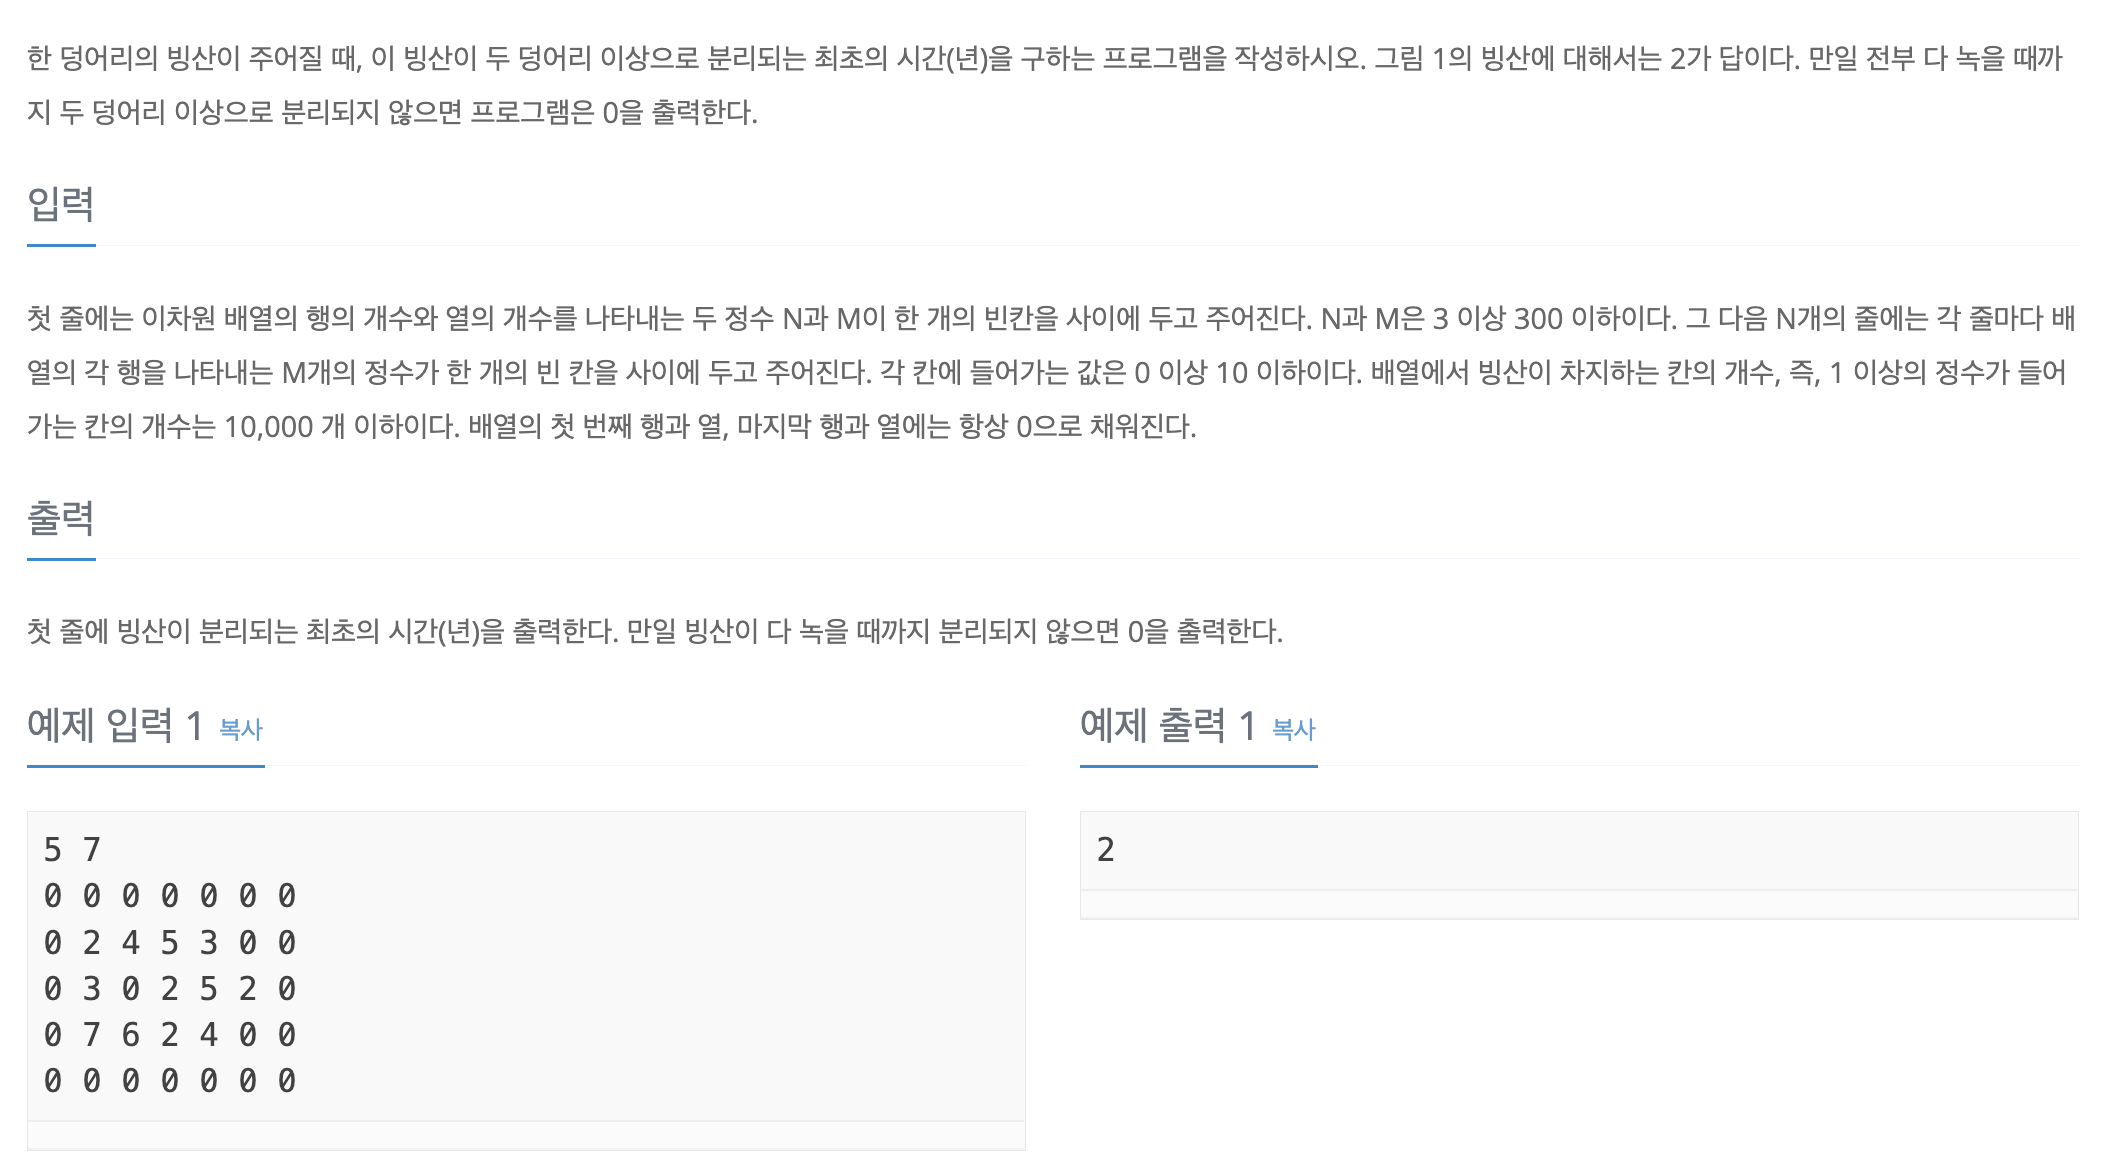

상상코딩 

    빙산 mat 복제 mat2
    2행부터 마지막 전 열까지 내부를 모두 탐색하며 0이 아닐때, 상하좌우 0개수에 따라 mat2에 녹는것 적용
    방문 매트릭스 생성 vst
    적용후, 2행부터 마지막 전열까지 내부 모두 탐색하며 0이 아닐때 vst 체크하며 DFS돌기 
    DFS 돈 횟수가 연결성분의 개수 mass -> 2이상되면 지난 횟수 출력
    모두 녹은 경우 0 출력

In [4]:
! # 끝 시간 체크

### 풀이

In [3]:
import sys
sys.setrecursionlimit(10**5)
# input = sys.stdin.readline

def chk(yr):
    while sum(icbg.values()):
        vst=[[0]*M for _ in range(N)]
        mass=1
        for (r,c),i in icbg.items():
            if i and vst[r][c]==0:
                if mass>=2:
                    return yr
                dfs(r, c, vst)
                mass+=1
        yr+=1
    return 0

def dfs(r, c, vst):
    vst[r][c]=1
    sea=0
    for i in range(4):
        nr,nc = r+dr[i], c+dc[i]
        if vst[nr][nc]==0:
            if mat[nr][nc]==0:
                sea+=1
            else:
                dfs(nr, nc, vst)
    mat[r][c] = max(mat[r][c]-sea, 0)
    if mat[r][c]==0:
        icbg[(r,c)]=0

N,M = map(int,input().split())
mat = [list(map(int,input().split())) for _ in range(N)]
icbg = dict()
for r in range(1,N-1):
    for c in range(1,M-1):
        if mat[r][c]:
            icbg[(r,c)]=1
dr=[-1,1,0,0];dc=[0,0,-1,1] # 상,하,좌,우
print(chk(0))

1


### 연습

In [62]:
icbg = dict()

In [63]:
icbg[(1,1)]=1

In [64]:
icbg

{(1, 1): 1}

In [66]:
for (r,c),i in icbg.items():
    print(r,c)

1 1


In [59]:
sum(icbg.values())

0

In [56]:
import sys
sys.setrecursionlimit(10**5)
input = sys.stdin.readline

def dfs(r, c, vis):
    vis[r][c]=1
    sea=0
    for i in range(4):
        nr,nc = r+dr[i], c+dc[i]
        if vis[nr][nc]==0:
            if mat[nr][nc]==0:
                sea += 1
            else:
                dfs(nr, nc, vis)
    mat[r][c] = max(mat[r][c]-sea, 0)
    if mat[r][c]==0:
        icbg[(r,c)] = False
def chk(yr):
    while sum(icbg.values()):
        vis = [[0]*m for _ in range(n)]
        mass=1
        for (r,c), i in icbg.items():
            if i and vis[r][c]==0:
                if mass >= 2:
                    return yr
                dfs(r, c, vis)
                mass+=1
        yr += 1
    return 0    

n,m=map(int,input().split())
mat = [list(map(int,input().split())) for _ in range(n)]
icbg = dict()
for i in range(1,n-1):
    for j in range(1,m-1):
        if mat[i][j]:
            icbg[(i,j)] = True
# 상,하,좌,우
dr=[-1,1,0,0]
dc=[0,0,-1,1]
print(chk(0))

In [55]:
from collections import deque
from copy import deepcopy

N,M=map(int,input().split())
mat=[list(map(int,input().split())) for _ in range(N)]
year=0
# 상,하,좌,우
dr=[-1,1,0,0]
dc=[0,0,-1,1]

def bfs(r,c):
    que = deque([(r,c)])
    while que:
        r,c = que.popleft()
        vst[r][c]=1
        for dx,dy in zip(dr,dc):
            nr,nc = r+dx, c+dy
            if mat[nr][nc]!=0 and vst[nr][nc]==0:
                vst[nr][nc]=1
                que.append((nr,nc))
def melt(r,c):
    zero=0
    for dx,dy in zip(dr,dc):
        nr,nc = r+dx, c+dy
        zero += int(mat[nr][nc]==0)
    mat2[r][c] = max(mat[r][c]-zero, 0)

while 1:
    vst=[[0]*M for _ in range(N)]
    mat2 = deepcopy(mat)
    mass=0
    for r in range(1,N-1):
        for c in range(1,M-1):
            if mat[r][c]!=0:
                melt(r,c)
    mat=mat2
    for r in range(1,N-1):
        for c in range(1,M-1):
            if mat[r][c]!=0 and vst[r][c]==0:
                bfs(r,c)
                mass+=1
    year+=1
    if mass>=2:
        break
    if sum(sum(i) for i in mat)==0:
        year=0
        break
print(year)

5 7
0 0 0 0 0 0 0
0 2 4 5 3 0 0
0 3 0 2 5 2 0
0 7 6 2 4 0 0
0 0 0 0 0 0 0
2


In [16]:
from copy import deepcopy

In [2]:
N,M=5,7

mat=[list(map(int,i.split())) for i in """0 0 0 0 0 0 0
0 2 4 5 3 0 0
0 3 0 2 5 2 0
0 7 6 2 4 0 0
0 0 0 0 0 0 0""".split('\n')]

In [22]:
# 상,하,좌,우
dr=[-1,1,0,0]
dc=[0,0,-1,1]

In [30]:
def dfs(r,c):
    vst[r][c]=1
    for dx,dy in zip(dr,dc):
        nr,nc = r+dx, c+dy
        if mat[nr][nc]!=0 and vst[nr][nc]==0:
            dfs(nr,nc)

def melt(r,c):
    zero=0
    for dx,dy in zip(dr,dc):
        nr,nc = r+dx, c+dy
        zero += int(mat[nr][nc]==0)
    mat2[r][c] = max(mat[r][c]-zero, 0)

In [43]:
while 1:
    vst=[[0]*M for _ in range(N)]
    mat2 = deepcopy(mat)
    mass=0
    for r in range(1,N-1):
        for c in range(1,M-1):
            if mat[r][c]!=0:
                melt(r,c)
    mat=mat2
    for r in range(1,N-1):
        for c in range(1,M-1):
            if mat[r][c]!=0 and vst[r][c]==0:
                dfs(r,c)
                mass+=1
    if mass>=2:
        break
    if sum(sum(i) for i in mat)==0:
        mass=0
        break

In [44]:
print(mass)

3
